## Loading the data from drive

In [1]:
import os

In [2]:
path = '/content/drive/MyDrive/Data'

# List all files and directories in the path
files = os.listdir(path)

# Print each file
for file in files:
    print(file)


text_files
output_images
input_images
output_gen_images
.ipynb_checkpoints


In [ ]:
# Define the paths
text_path = '/content/drive/MyDrive/Data/text_files'
input_images_path = '/content/drive/MyDrive/Data/input_images'
output_images_path = '/content/drive/MyDrive/Data/output_images'

# Load text files
text_files = []
for file in os.listdir(text_path):
    with open(os.path.join(text_path, file), 'r') as f:
        text_files.append(f.read())

# Load input images
input_images = []
for file in os.listdir(input_images_path):
    img = Image.open(os.path.join(input_images_path, file))
    input_images.append(img)

# Load output images
output_images = []
for file in os.listdir(output_images_path):
    img = Image.open(os.path.join(output_images_path, file))
    output_images.append(img)


In [ ]:
text_files

['Generate a motivation post with deep quote',
 'Generate an event invitation post for our monday session\n\nBackground color: #0000FF',
 'Create a new year post\n\nBackground color: #7C898B',
 'Generate a birthday post for femi\n\nBackground color: #243655',
 'Generate a post for world art day\n\nNote for Timothy:\nBackground color: #1A1C47']

In [ ]:
input_images

[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=138x70>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=129x129>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=138x70>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=138x70>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=864x416>]

In [ ]:
output_images

[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1080x1080>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1080x1080>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1080x1080>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1080x1080>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=940x788>]

In [ ]:
import numpy as np

# Define the number of duplicates to generate
num_duplicates = 50

# Generate duplicates of the texts
text_files_duplicates = text_files * num_duplicates

# Generate duplicates of the input images
input_images_duplicates = []
for img in input_images:
    for i in range(num_duplicates):
        input_images_duplicates.append(img.copy())

# Generate duplicates of the output images
output_images_duplicates = []
for img in output_images:
    for i in range(num_duplicates):
        output_images_duplicates.append(img.copy())


In [ ]:
len(text_files_duplicates)

250

In [ ]:
!pip install torch transformers diffusers datasets Pillow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.1 MB/s eta 0:00:00


In [ ]:
!pip install clip transformers diffusers torch --quiet

  Preparing metadata (setup.py) ... done


In [ ]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-bxo8y7rx
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-bxo8y7rx
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 760.9 kB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369499 sha256=4dbdb7cbb7f3fb157ccd9450a86984b4c3a9ec1f5e6aa6dd17c84c524e2d2856
  Stored in directory: /tmp/pip-ephem-wheel-cache-__kctimi/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip
  Attempting uninstall: clip
    Found existing installation: clip 0.2.0
    Uninstalling clip-0.2.0:
      Successfully uninstalled clip-0.2.0


In [ ]:
import torch
import clip
from PIL import Image
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from diffusers import StableDiffusionPipeline

In [ ]:
# Load CLIP model and tokenizer
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, clip_preprocess = clip.load("ViT-B/32", device=device)

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 145MiB/s]


In [ ]:
# Paths to your folders
text_folder = '/content/drive/MyDrive/Data/text_files'
input_image_folder = '/content/drive/MyDrive/Data/input_images'
output_image_folder = '/content/drive/MyDrive/Data/output_gen_images'

In [ ]:
# Load text instructions
text_files = [f for f in os.listdir(text_folder) if os.path.isfile(os.path.join(text_folder, f))]
instructions = []

for file_name in text_files:
    with open(os.path.join(text_folder, file_name), 'r') as file:
        instructions.append(file.read())

# Load input images
input_images = [Image.open(os.path.join(input_image_folder, f)) for f in os.listdir(input_image_folder) if f.endswith('.png')]

# Generate CLIP embeddings for text instructions
text_tokens = clip.tokenize(instructions).to(device)
with torch.no_grad():
    text_embeddings = clip_model.encode_text(text_tokens)

# Generate CLIP embeddings for input images
image_embeddings = []
for img in input_images:
    image = clip_preprocess(img).unsqueeze(0).to(device)
    with torch.no_grad():
        image_embedding = clip_model.encode_image(image)
    image_embeddings.append(image_embedding)
image_embeddings = torch.cat(image_embeddings)

# Ensure all embeddings have the same dimensions
text_embeddings = text_embeddings.unsqueeze(1) if text_embeddings.dim() == 1 else text_embeddings
image_embeddings = image_embeddings.squeeze(1) if image_embeddings.dim() == 3 else image_embeddings


In [ ]:
image_embeddings

tensor([[ 0.3911,  0.0851,  0.0284,  ...,  0.4973, -0.1771, -0.3196],
        [ 0.3970,  0.0052,  0.0663,  ...,  0.5356,  0.1198, -0.4773],
        [ 0.3911,  0.0851,  0.0284,  ...,  0.4973, -0.1771, -0.3196],
        [ 0.3911,  0.0851,  0.0284,  ...,  0.4973, -0.1771, -0.3196],
        [-0.0456, -0.1720, -0.1780,  ...,  0.3081,  0.2983, -0.4626]],
       device='cuda:0', dtype=torch.float16)

In [ ]:
text_embeddings

tensor([[-0.0964,  0.1392,  0.0264,  ..., -0.0792,  0.2634,  0.2003],
        [ 0.0718, -0.4976, -0.1153,  ..., -0.1059,  0.3401,  0.6113],
        [ 0.0698, -0.2032,  0.0248,  ..., -0.2927,  0.0789,  0.5693],
        [ 0.0157, -0.2347, -0.0342,  ..., -0.0520,  0.2241,  0.1003],
        [ 0.3669, -0.2344, -0.2705,  ...,  0.0618,  0.2418,  0.2067]],
       device='cuda:0', dtype=torch.float16)

In [ ]:
# Load pre-trained Stable Diffusion model
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4").to("cuda")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## Seeing what the model will initialy generate

In [ ]:
def generate_image(prompt_embedding, image_embedding):
    # Reshape prompt_embedding to have the same shape as image_embedding
    prompt_embedding = prompt_embedding.unsqueeze(0)

    # Add an extra dimension to image_embedding
    image_embedding = image_embedding.unsqueeze(0)

    # Combine text and image embeddings
    combined_embedding = torch.cat([prompt_embedding, image_embedding], dim=1)

    # Generate an image based on the combined embeddings
    prompt = "Generate an image based on the combined embeddings"  # Simplified placeholder
    image = pipe(prompt).images[0]
    return image



# Generate images based on the embeddings
output_images = [generate_image(text_emb, img_emb) for text_emb, img_emb in zip(text_embeddings, image_embeddings)]

# Save output images
for i, image in enumerate(output_images):
    image.save(os.path.join(output_image_folder, f'output_image_{i}.png'))

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
output_images

[<PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>]

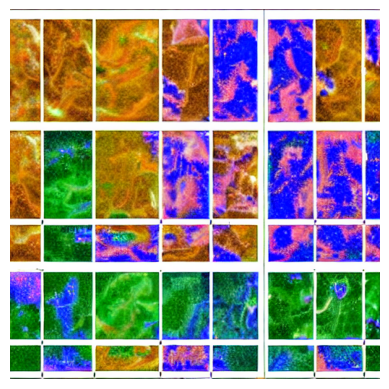

In [ ]:
import matplotlib.pyplot as plt

# Display the first generated image
plt.imshow(output_images[0])
plt.axis('off')
plt.show()


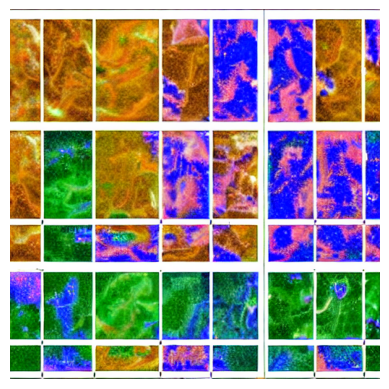

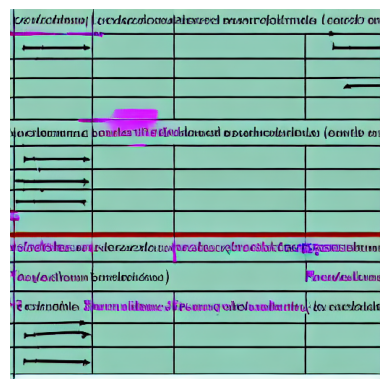

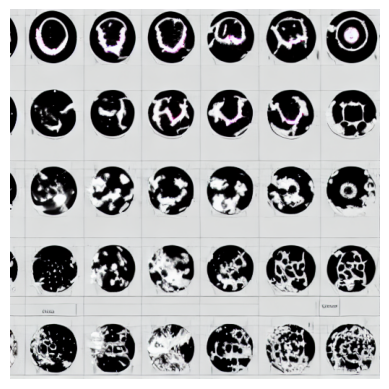

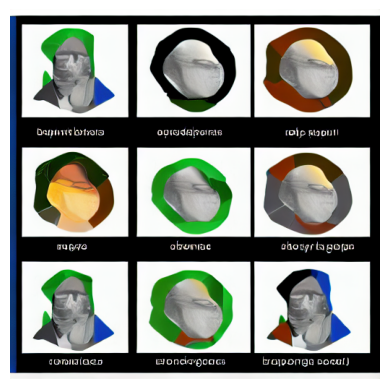

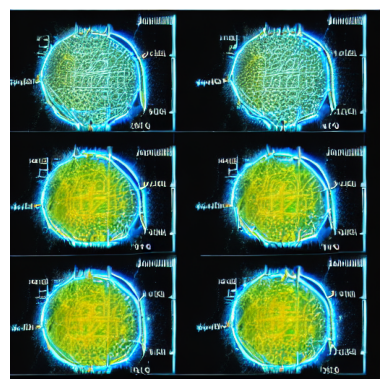

In [ ]:
for i in range(5):
  # Display the first generated image
  plt.imshow(output_images[i])
  plt.axis('off')
  plt.show()


## Finetuning scenario


In [ ]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline
from diffusers import DDPMScheduler

In [ ]:
class DesignDataset(Dataset):
    def __init__(self, input_images_dir, text_prompts_dir, output_images_dir, preprocess, tokenizer):
        self.input_images_dir = input_images_dir
        self.text_prompts_dir = text_prompts_dir
        self.output_images_dir = output_images_dir
        self.preprocess = preprocess
        self.tokenizer = tokenizer

        self.image_files = sorted(os.listdir(input_images_dir))
        self.text_files = sorted(os.listdir(text_prompts_dir))
        self.output_files = sorted(os.listdir(output_images_dir))

        # Ensure proper pairing by sorting based on numerical order in filenames
        self.image_files.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))
        self.text_files.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))
        self.output_files.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
      input_image_path = os.path.join(self.input_images_dir, self.image_files[idx])
      text_prompt_path = os.path.join(self.text_prompts_dir, self.text_files[idx])
      output_image_path = os.path.join(self.output_images_dir, self.output_files[idx])

      input_image = Image.open(input_image_path).convert("RGB")
      output_image = Image.open(output_image_path).convert("RGB")

      with open(text_prompt_path, 'r') as file:
          text_prompt = file.read().strip()

      input_image = self.preprocess(input_image)
      output_image = self.preprocess(output_image)
      text_input = self.tokenizer(text_prompt, return_tensors="pt").input_ids.squeeze(0).tolist()

      return input_image, text_input, output_image


In [ ]:
# Paths to your dataset directories and files
input_images_dir = '/content/drive/MyDrive/Data/input_images'
text_prompts_dir = '/content/drive/MyDrive/Data/text_files'
output_images_dir = '/content/drive/MyDrive/Data/output_images'

In [ ]:
# Load the CLIP model and tokenizer
clip_model_name = "openai/clip-vit-base-patch32"
tokenizer = CLIPTokenizer.from_pretrained(clip_model_name)
preprocess = clip.load("ViT-B/32")[1]  # Preprocessing pipeline for images

In [ ]:
# Set up the optimizer and scheduler
optimizer = torch.optim.AdamW(pipe.unet.parameters(), lr=5e-5)
scheduler = DDPMScheduler(beta_start=0.0001, beta_end=0.02, num_train_timesteps=1000)

In [ ]:
def collate_fn(batch):
    input_images, text_inputs, output_images = zip(*batch)

    # Pad text inputs to have the same length
    max_length = max([len(text) for text in text_inputs])
    padded_text_inputs = [text + [0] * (max_length - len(text)) for text in text_inputs]
    text_inputs = torch.tensor(padded_text_inputs)

    input_images = torch.stack(input_images)
    output_images = torch.stack(output_images)

    return input_images, text_inputs, output_images


In [ ]:
# Create the dataset and dataloader
dataset = DesignDataset(input_images_dir, text_prompts_dir, output_images_dir, preprocess, tokenizer)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)

In [ ]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    for batch in dataloader:
        input_images, text_inputs, output_images = batch
        input_images = input_images.to("cuda")
        text_inputs = text_inputs.to("cuda")
        output_images = output_images.to("cuda")

        optimizer.zero_grad()

        # Forward pass
        prompt = "Generate an image based on the input image and text"
        generated_images = pipe(
            input_images=input_images,
            text_inputs=text_inputs,
            prompt=prompt
        ).images

        # Convert Image objects to tensors
        generated_images = [torch.tensor(np.array(img)) for img in generated_images]

        # Convert generated_images list to tensor
        generated_images = torch.stack(generated_images)

        # Resize generated_images tensor to match the size of output_images tensor
        generated_images = torch.nn.functional.interpolate(generated_images, size=(output_images.shape[2], output_images.shape[3]), mode='bilinear', align_corners=False)

        # Convert generated_images tensor to have the same number of channels as output_images tensor
        generated_images = generated_images[:, :output_images.shape[1], :, :]

        # Calculate loss (simple L1 loss for this example)
        loss = torch.nn.functional.l1_loss(generated_images, output_images)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}")


  0%|          | 0/50 [00:00<?, ?it/s]

<ipython-input-90-e7c778baf4c9>:34: UserWarning: Using a target size (torch.Size([4, 3, 224, 224])) that is different to the input size (torch.Size([1, 3, 224, 224])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = torch.nn.functional.l1_loss(generated_images, output_images)


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [ ]:

output_images.shape, generated_images.shape

(torch.Size([4, 3, 224, 224]), torch.Size([1, 512, 224, 224]))

In [ ]:
# Save the fine-tuned model
pipe.save_pretrained("/path/to/save/fine-tuned-model")